In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,r2_score
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
full = pd.read_csv("E:/Python Programs/full_gender_height_weight.csv")
full.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
full.shape

(10000, 3)

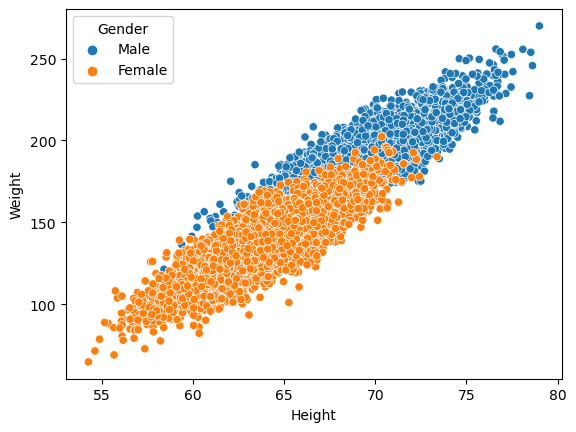

In [6]:
sns.scatterplot(data=full, x="Height", y="Weight",hue="Gender")
plt.show()

In [13]:
X=full[["Height"]]
y=full["Weight"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1000,random_state=20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9000, 1), (9000,), (1000, 1), (1000,))

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.score(X_test, y_test)

0.8595232260008574

In [27]:
w, b = model.coef_, model.intercept_
w, b

(array([7.7095182]), -350.2165637479032)

In [32]:
y_predict = X_test.dot(w)+b
y_predict.shape # (1000,)
y_predict.values

array([134.74080442, 218.35077442, 145.78910963, 204.62439848,
       172.38340442, 148.94524553, 133.27634964, 170.87468102,
       132.05098261, 186.1281045 , 166.87516888, 131.32620787,
       143.29786376, 141.07358985, 130.12267869, 148.61849918,
       185.38753714, 139.61129362, 151.5094108 , 141.1166966 ,
       188.50257558, 175.40804162, 135.87012705, 127.61887078,
       187.56170278, 165.67997271, 185.64089969, 149.18608991,
       142.28907671, 136.00889449, 143.72835297, 178.63065567,
       122.14539802, 227.80634289, 218.8887719 , 175.81258982,
       143.97703922, 206.65455045, 116.81111452, 151.07498292,
       139.03521385, 125.27615174, 183.308528  , 159.4686704 ,
       111.41914479, 195.53790388, 208.72933901, 151.75136327,
       144.41330397, 129.93994603, 170.58699631, 138.49254712,
       150.16613472, 153.54805105, 229.19543811, 127.59092381,
       159.46724668, 142.87493158, 120.28886208, 137.05846324,
       156.16282151, 174.98497192, 124.76834392, 136.88

In [29]:
model.predict(X_test)

array([134.74080442, 218.35077442, 145.78910963, 204.62439848,
       172.38340442, 148.94524553, 133.27634964, 170.87468102,
       132.05098261, 186.1281045 , 166.87516888, 131.32620787,
       143.29786376, 141.07358985, 130.12267869, 148.61849918,
       185.38753714, 139.61129362, 151.5094108 , 141.1166966 ,
       188.50257558, 175.40804162, 135.87012705, 127.61887078,
       187.56170278, 165.67997271, 185.64089969, 149.18608991,
       142.28907671, 136.00889449, 143.72835297, 178.63065567,
       122.14539802, 227.80634289, 218.8887719 , 175.81258982,
       143.97703922, 206.65455045, 116.81111452, 151.07498292,
       139.03521385, 125.27615174, 183.308528  , 159.4686704 ,
       111.41914479, 195.53790388, 208.72933901, 151.75136327,
       144.41330397, 129.93994603, 170.58699631, 138.49254712,
       150.16613472, 153.54805105, 229.19543811, 127.59092381,
       159.46724668, 142.87493158, 120.28886208, 137.05846324,
       156.16282151, 174.98497192, 124.76834392, 136.88

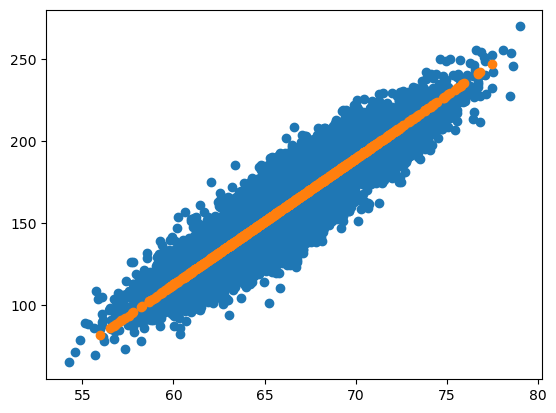

In [34]:
plt.scatter(x=X, y=y)
plt.scatter(x=X_test.Height, y=y_predict)
plt.show()

In [35]:
full = pd.get_dummies(data=full, columns=['Gender'])
full.head()

,Height,Weight,Gender_Female,Gender_Male
0,73.847017,241.893563,False,True
1,68.781904,162.310473,False,True
2,74.110105,212.740856,False,True
3,71.730978,220.042470,False,True
4,69.881796,206.349801,False,True


In [36]:
X = full[["Height","Gender_Female"]]
y = full['Weight']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1000,random_state=20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9000, 2), (9000,), (1000, 2), (1000,))

In [38]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9018082777758103

In [44]:
w, b = model.coef_, model.intercept_
w, b, X_test.shape, w.shape

(array([  5.96544585, -19.43344493]), -224.7611944810514, (1000, 2), (2,))

In [49]:
y_predict = X_test.dot(w)+b
y_predict[:10]

9957    131.054091
1687    215.182986
2116    159.036458
231     204.561836
2780    179.614505
4578    161.478602
8260     129.92093
8557    159.013645
9523     128.97277
802     190.249834
dtype: object

In [50]:
y_predict=model.predict(X_test)
y_predict[:10]

array([131.05409141, 215.18298626, 159.03645792, 204.56183585,
       179.6145046 , 161.47860246, 129.92093036, 159.0136446 ,
       128.97276985, 190.24983381])

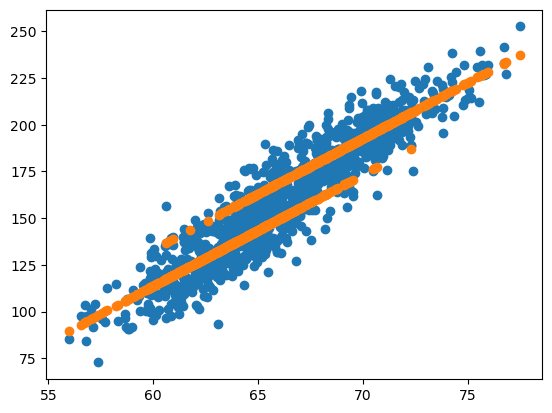

In [60]:
# plt.scatter(x=X_train.Height, y=y_train)
plt.scatter(x=X_test.Height, y=y_test)
plt.scatter(x=X_test.Height, y=y_predict)
plt.show()